# Project Title : AI-Optimized Power Consumption Forecasting
- This project focuses on developing an AI system to forecast energy consumption using machine learning regression techniques.
- By utilizing Python libraries such as pandas, NumPy, scikit-learn, and data visualization tools like matplotlib and seaborn, you will build models that predict energy usage based on various environmental and operational factors.

### Data Loading

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('household_power_consumption.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


### Initial Observations on the dataset

In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [4]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
# Convert all columns except 'Date' and 'Time' to numeric
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# Combine 'Date' and 'Time' into a single 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop the original 'Date' and 'Time' columns if no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

In [7]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1048575
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,2007-12-15 19:31:00.000001792
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-06-16 18:27:30
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-15 19:31:00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-06-14 20:34:30
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,2008-12-13 21:38:00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,NaN


### Checking for missing values and dropping the missing values

In [9]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

         Global_active_power  Global_reactive_power  Voltage  \
6839                     NaN                    NaN      NaN   
6840                     NaN                    NaN      NaN   
19724                    NaN                    NaN      NaN   
19725                    NaN                    NaN      NaN   
41832                    NaN                    NaN      NaN   
...                      ...                    ...      ...   
1043669                  NaN                    NaN      NaN   
1043670                  NaN                    NaN      NaN   
1043671                  NaN                    NaN      NaN   
1043672                  NaN                    NaN      NaN   
1043673                  NaN                    NaN      NaN   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
6839                  NaN             NaN             NaN             NaN   
6840                  NaN             NaN             NaN             NaN   


In [10]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [11]:
df.isnull().sum()

Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
Datetime                    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [14]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [15]:
# Check the cleaned dataset
print(df.head())
print("Shape of dataset after removing rows with '?':", df.shape)

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  
Shape of dataset after removing rows with '?': (1044506, 8)


### Feature Engineering

In [16]:
# Now calculate Power (W), Current (A), and Apparent Power (VA)
df['Power_W'] = df['Global_active_power'] * 1000  # Convert kW to W

# Calculate Current (A)
df['Current_A'] = df['Power_W'] / df['Voltage']

# Calculate Apparent Power (VA)
df['Apparent_Power_VA'] = df['Voltage'] * df['Current_A']

# Display the processed data to check the changes
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Power_W,Current_A,Apparent_Power_VA
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,4216.0,17.952649,4216.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5360.0,22.942259,5360.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5374.0,23.035707,5374.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5388.0,23.051254,5388.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,3666.0,15.554990,3666.0


In [17]:
# Ensure that the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract 'hour', 'day', and 'month' from the 'Datetime' column
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

# # Drop the 'Datetime' column since it's now represented by new features
# df.drop(['Datetime'], axis=1, inplace=True)

# Display the processed data to check the changes
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Power_W,Current_A,Apparent_Power_VA,Hour,Day,Month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,4216.0,17.952649,4216.0,17,16,12
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5360.0,22.942259,5360.0,17,16,12
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5374.0,23.035707,5374.0,17,16,12
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5388.0,23.051254,5388.0,17,16,12
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,3666.0,15.554990,3666.0,17,16,12


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044506 entries, 0 to 1044505
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1044506 non-null  float64       
 1   Global_reactive_power  1044506 non-null  float64       
 2   Voltage                1044506 non-null  float64       
 3   Global_intensity       1044506 non-null  float64       
 4   Sub_metering_1         1044506 non-null  float64       
 5   Sub_metering_2         1044506 non-null  float64       
 6   Sub_metering_3         1044506 non-null  float64       
 7   Datetime               1044506 non-null  datetime64[ns]
 8   Power_W                1044506 non-null  float64       
 9   Current_A              1044506 non-null  float64       
 10  Apparent_Power_VA      1044506 non-null  float64       
 11  Hour                   1044506 non-null  int32         
 12  Day                    10445

### Exploratory Data Analysis

#### Current Usage on 5 Peak Hours

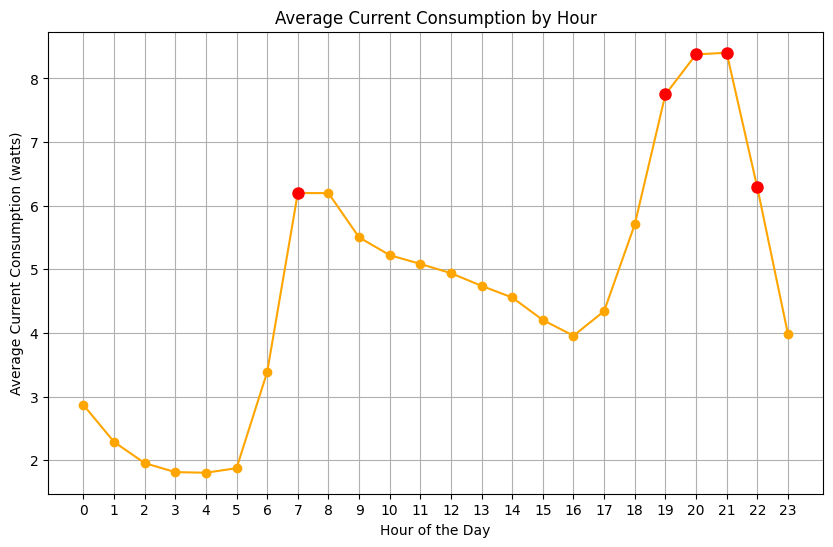

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the current consumption data
# Group data by 'Hour' and calculate the mean current consumption for each hour
hourly_consumption = df.groupby('Hour')['Current_A'].mean()

# Find the top 5 peak hours with the highest current consumption
top_5_peak_hours = hourly_consumption.nlargest(5)

# Plotting the average current consumption by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_consumption.index, hourly_consumption.values, marker='o', color='orange')

# Highlight the top 5 peak hours by changing the marker color
for peak_hour in top_5_peak_hours.index:
    plt.plot(peak_hour, top_5_peak_hours[peak_hour], marker='o', color='red', markersize=8)

plt.title('Average Current Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Current Consumption (watts)')
plt.xticks(range(0, 24))  # Set x-ticks to show each hour
plt.grid(True)
plt.show()


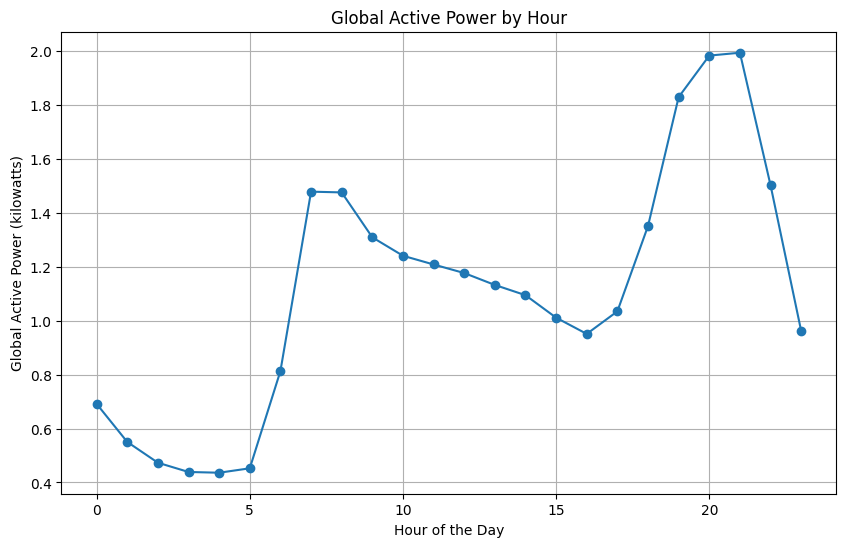

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'Hour' and calculate the mean Global Active Power for each hour
hourly_data = df.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o')
plt.title('Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


#### Distribution Plot (Global_active_power, voltage)

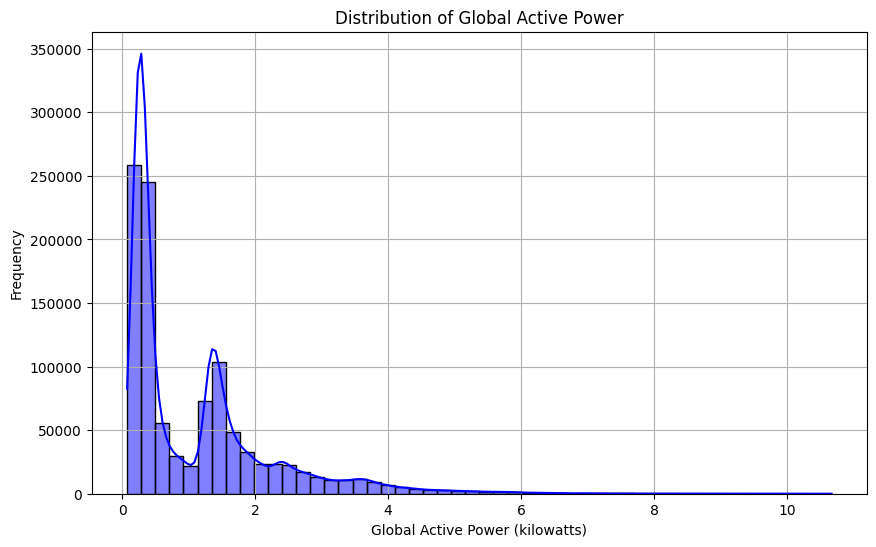

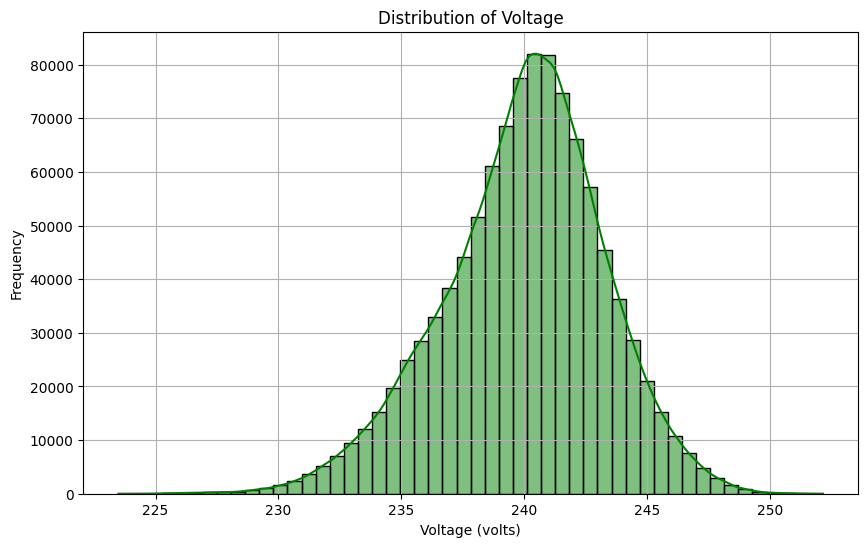

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Global Active Power
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='blue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Voltage
plt.figure(figsize=(10, 6))
sns.histplot(df['Voltage'], bins=50, kde=True, color='green')
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (volts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Distribution of Global Active,Reactive and Voltage over TIme

In [22]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Power_W                         float64
Current_A                       float64
Apparent_Power_VA               float64
Hour                              int32
Day                               int32
Month                             int32
dtype: object

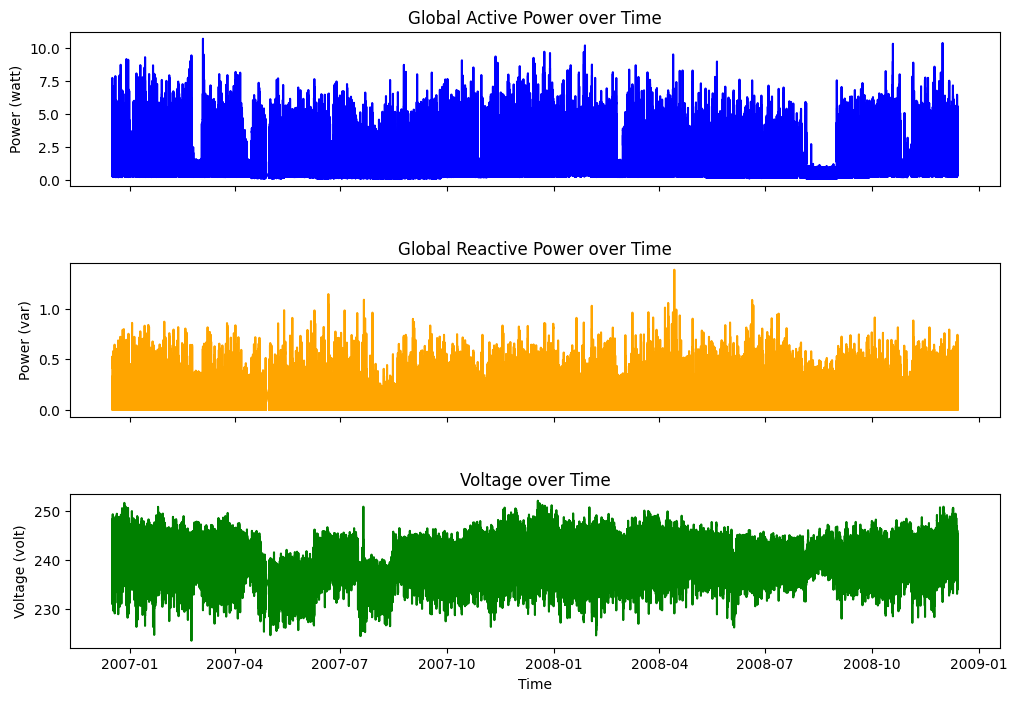

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data in numpy arrays or pandas dataframes
global_active_power = df['Global_active_power']  # Replace with your actual data
global_reactive_power = df['Global_reactive_power']
voltage = df['Voltage']
time = df['Datetime']  # Assuming you have the time values as well

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the Global Active Power
ax1.plot(time, global_active_power, color='blue')
ax1.set_title('Global Active Power over Time')
ax1.set_ylabel('Power (watt)')

# Plot the Global Reactive Power
ax2.plot(time, global_reactive_power, color='orange')
ax2.set_title('Global Reactive Power over Time')
ax2.set_ylabel('Power (var)')

# Plot the Voltage
ax3.plot(time, voltage,color='green')
ax3.set_title('Voltage over Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage (volt)')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

#### Box Plot of Global_active_power Across Hours

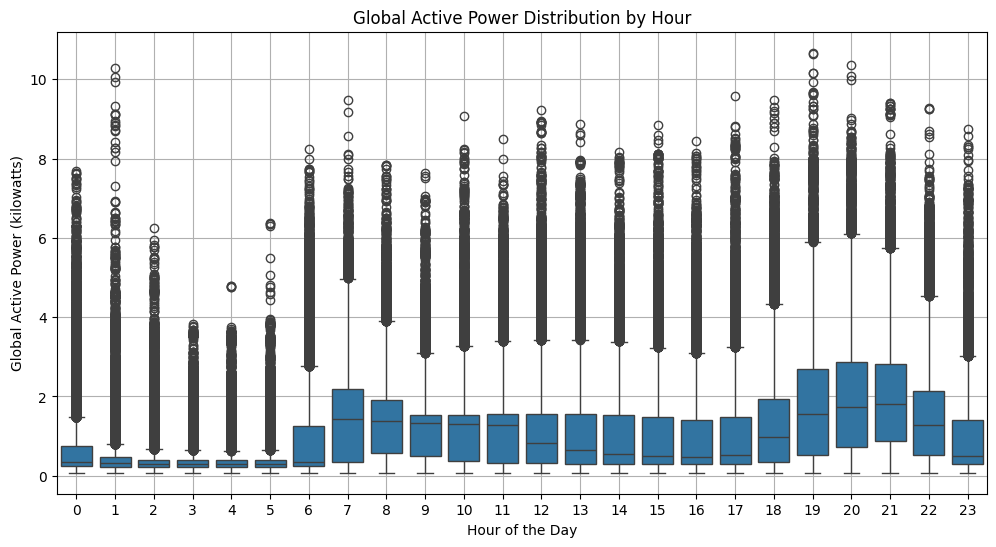

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Global_active_power', data=df)
plt.title('Global Active Power Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


In [25]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Power_W                         float64
Current_A                       float64
Apparent_Power_VA               float64
Hour                              int32
Day                               int32
Month                             int32
dtype: object

In [26]:
df = df.drop(columns=['Datetime'])

In [27]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Power_W                  float64
Current_A                float64
Apparent_Power_VA        float64
Hour                       int32
Day                        int32
Month                      int32
dtype: object

## Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

# Define the target variable ('Global_active_power' or 'current_consumption')
target = 'Current_A'

# Select features (all columns except the target)
features = df.drop(columns=[target])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Display the shapes of the resulting splits to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((835604, 12), (208902, 12), (835604,), (208902,))

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Check if there's any overlap between training and test sets
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 835604, Test set size: 208902


### Scaling the features

In [30]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Evaluation

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("----Model Evaluation Metrics----")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


----Model Evaluation Metrics----
Mean Absolute Error (MAE): 0.03858352312064906
Root Mean Squared Error (RMSE): 0.06302735150369476
R-squared (R²): 0.999827018614224


In [32]:
# Cross-validation
cv_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

Cross-validated scores: [0.99982778 0.99982408 0.9998285  0.99982896 0.99982364]
Mean CV score: 0.9998265902071607


In [33]:
sample_results = pd.DataFrame({'Actual': y_test[:20].values, 'Predicted': y_pred[:20]})
print(sample_results)

       Actual  Predicted
0    1.199151   1.194386
1    5.672102   5.669013
2    1.304275   1.329133
3    7.465457   7.518931
4    7.867731   7.933480
5    1.238494   1.227009
6    3.612331   3.630913
7   10.808550  10.848027
8    1.880025   1.844456
9    1.378456   1.366587
10   1.170265   1.124765
11   0.904136   0.940028
12   0.454301   0.438492
13   0.821011   0.820309
14   2.006186   2.019275
15   4.411083   4.422675
16   1.351517   1.287268
17   6.844748   6.837445
18   1.251147   1.240598
19   6.997393   7.242311


In [34]:
print(features.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Power_W', 'Apparent_Power_VA', 'Hour', 'Day',
       'Month'],
      dtype='object')


#### Residual Plots

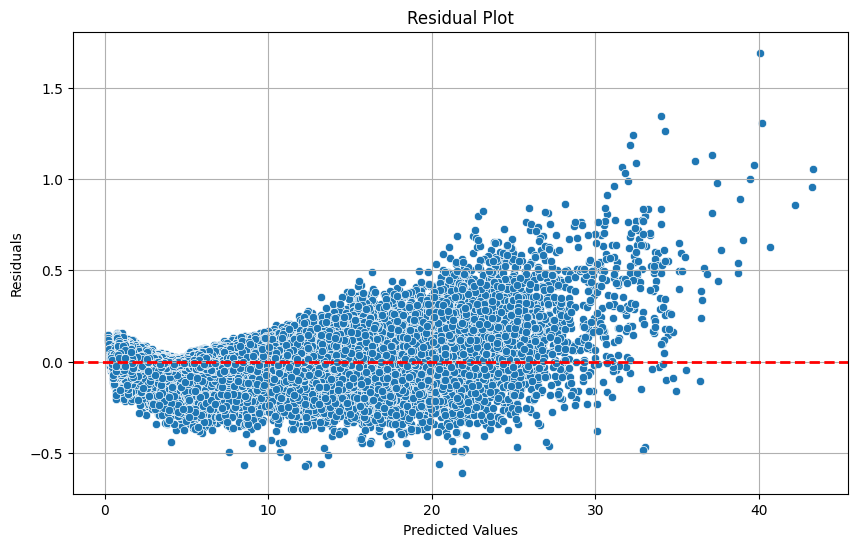

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted values from the model
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### Actual vs Predicted Plot

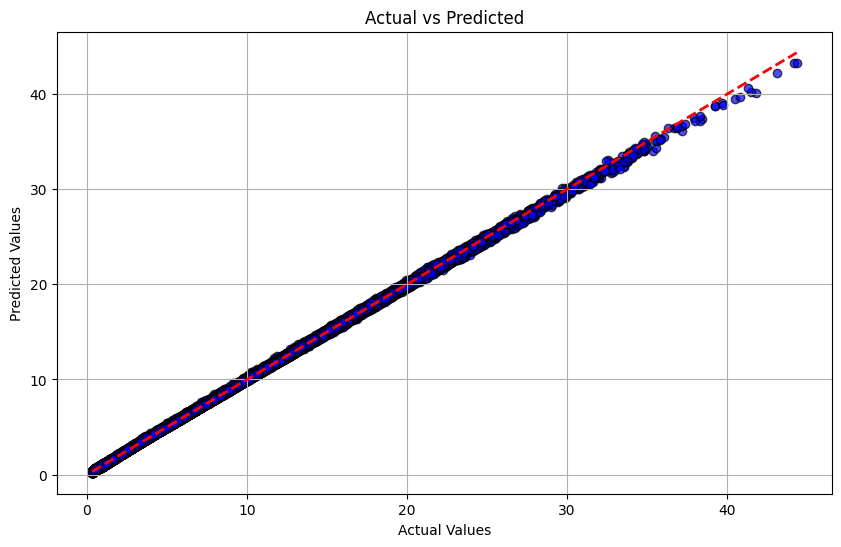

In [36]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


#### Error Distribution Plot

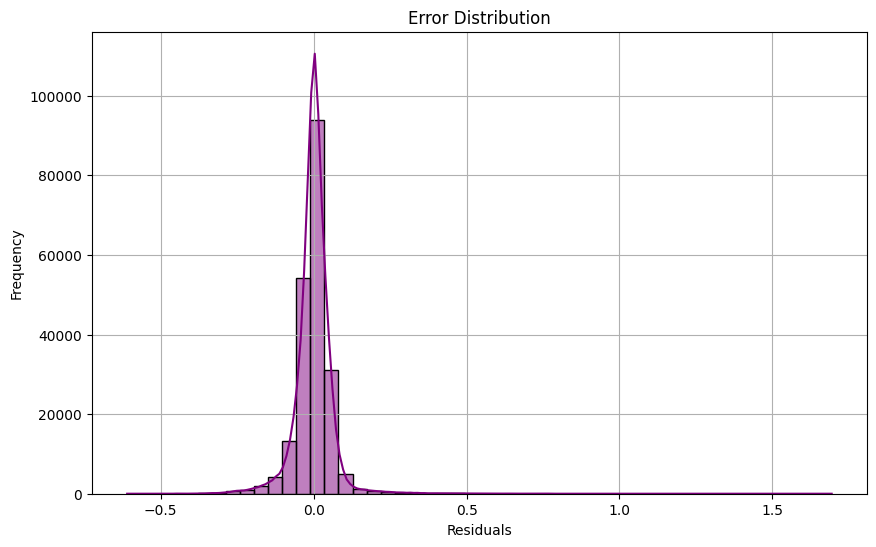

In [37]:
# Error distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=50)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Distribution of Current Consumption

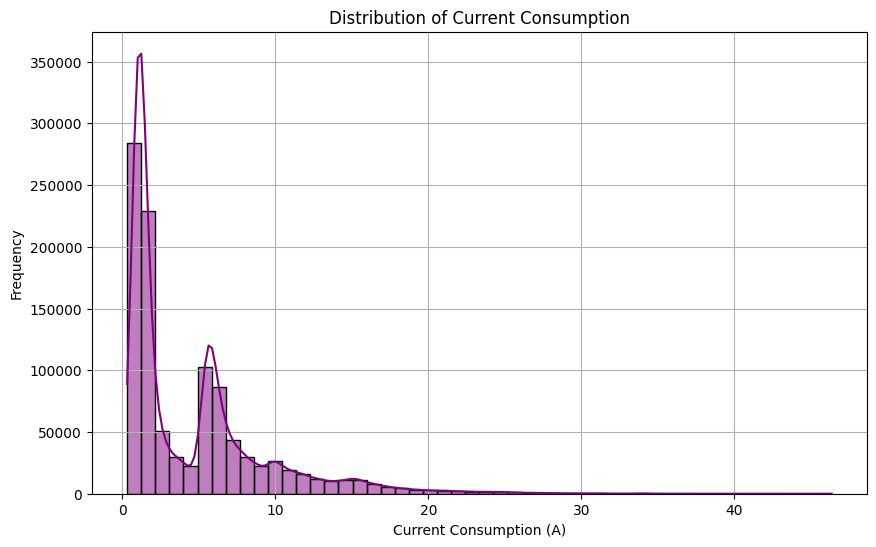

In [38]:
# Error distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Current_A'], kde=True, color='purple', bins=50)
plt.title('Distribution of Current Consumption')
plt.xlabel('Current Consumption (A)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Tuning Linear Reg by selecting 5 important features

In [39]:
from sklearn.feature_selection import RFE

# Initialize RFE with Linear Regression
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Apparent_Power_VA'],
      dtype='object')


In [40]:
# Filter the selected features for training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Linear Regression model with selected features
linear_reg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_selected)


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("----Model Evaluation with Selected Features----")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


----Model Evaluation with Selected Features----
Mean Absolute Error (MAE): 0.039944462440211506
Root Mean Squared Error (RMSE): 0.06439446132597967
R-squared (R²): 0.9998194330403996


### Feature Correlation

C:\Users\gauth\AppData\Local\Temp\ipykernel_11868\755718552.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")


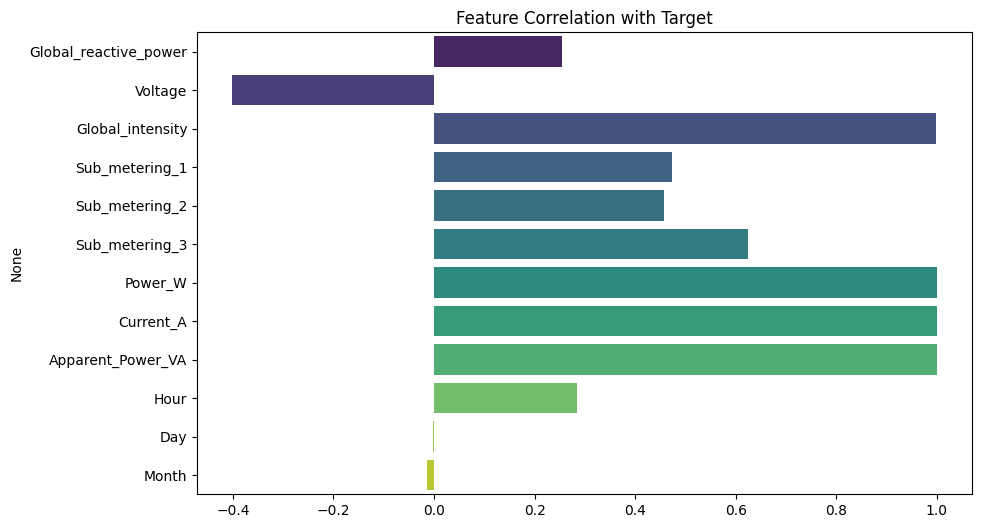

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['Global_active_power'].drop('Global_active_power')

# Plot correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.title("Feature Correlation with Target")
plt.show()


### XGBoost

In [56]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your DataFrame
target = 'Global_active_power'  # or any other target variable

# Select features (all columns except the target)
features = df.drop(columns=[target])
target = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [57]:
# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
# Fit the model
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [48]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("----XGBoost Model Evaluation Metrics----")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


----XGBoost Model Evaluation Metrics----
Mean Absolute Error (MAE): 3.539133048298573
Root Mean Squared Error (RMSE): 5.09088756353846
R-squared (R²): -19.21885541827097


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


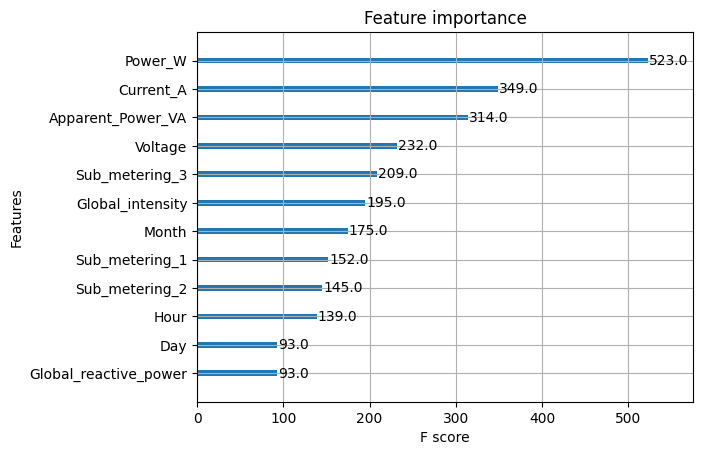

In [50]:
# Get feature importance
import matplotlib.pyplot as plt

xg_reg.feature_importances_

# Plot feature importance
xgb.plot_importance(xg_reg)
plt.show()
